## Optimising, training and testing models

In [2]:
'''This step is to import all the various libraries and tools to run these tests'''

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import statistics

After importing the various libraries the next step is to create the test and train data.
This will use the CSV file (Test - Train Modelling Data.csv) from the Pre-Processing step (Notebook 1 - Retirement Modelling - Data Pre-Processing - FINAL).

In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train= pd.read_csv('y_train.csv')
y_test= pd.read_csv('y_test.csv')

#### The train-test data will now be used to optimise and run test, both single run and multi run tests, for each of the following models:

1. Random Forest
1. Support Vector Machines
1. Logistic Regression
1. K-Nearest Neighbor

# Random Forest Classifier

#### Optimising

In [4]:
'''Optimising the model to get the optimal hyperparameters'''

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

<ipython-input-4-290425e06fc7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


RandomForestClassifier()

In [5]:
RF_y_predicted = RF_model.predict(X_test)

In [6]:
RF_cm = confusion_matrix(y_test, RF_y_predicted)
RF_cm

array([[669,  77],
       [ 50, 591]], dtype=int64)

Text(69.0, 0.5, 'Truth')

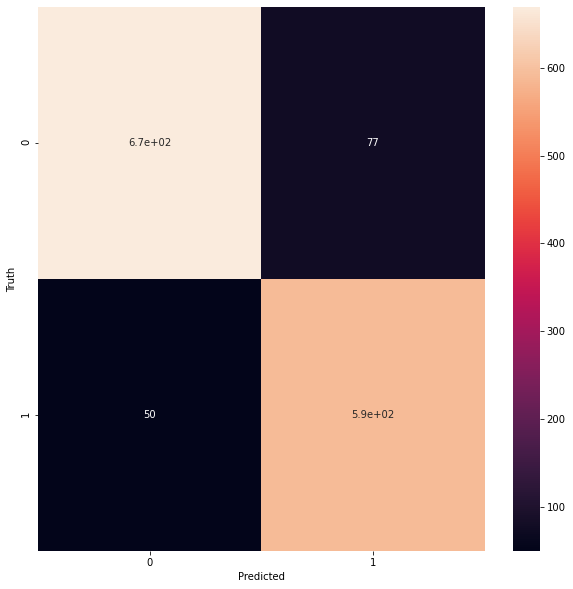

In [7]:
plt.figure(figsize=(10,10))
sn.heatmap(RF_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Performance metrics

1. Accuracy
1. F1 Score
1. AUC

In [8]:
RF_model.score(X_test, y_test)

0.9084354722422494

In [9]:
print('F1 Score: ', f1_score(y_test, RF_y_predicted))

F1 Score:  0.9029793735676089


In [10]:
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, RF_y_predicted)
auc_rfc = auc(rfc_fpr, rfc_tpr)

print(auc_rfc)

0.9093898608491258


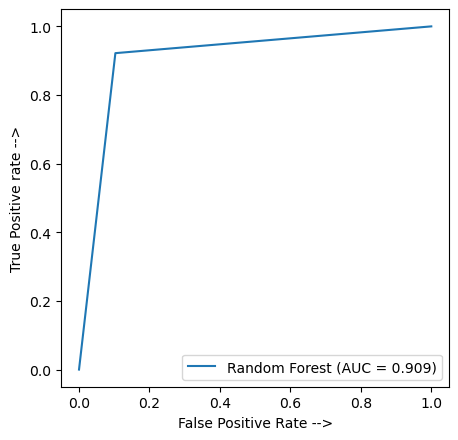

In [11]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random Forest (AUC = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

###### Optimising

In [12]:
param_grid_RF = [{
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'max_depth':[5,10,15,20],
    'max_features':[2,3,4,5,6]},]

RF_optimal_params = GridSearchCV(estimator=RF_model, param_grid=param_grid_RF, cv=10, n_jobs=-1)

RF_optimal_params.fit(X_train, y_train)
print(RF_optimal_params.best_params_)

{'max_depth': 15, 'max_features': 4, 'n_estimators': 70}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


#### Single Run after optimisation

In [13]:
RF_model_opt = RandomForestClassifier(max_depth=15, max_features=4, n_estimators=70)
RF_model_opt.fit(X_train, y_train)

<ipython-input-13-59afd29170ca>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_opt.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, max_features=4, n_estimators=70)

In [14]:
RF_y_predicted_opt = RF_model_opt.predict(X_test)

In [15]:
RF_model_opt.score(X_test, y_test)

0.9033886085075703

In [16]:
print('F1 Score: ', f1_score(y_test, RF_y_predicted_opt))

F1 Score:  0.8973966309341501


In [17]:
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, RF_y_predicted_opt)
auc_rfc = auc(rfc_fpr, rfc_tpr)

print(auc_rfc)

0.9041492222691591


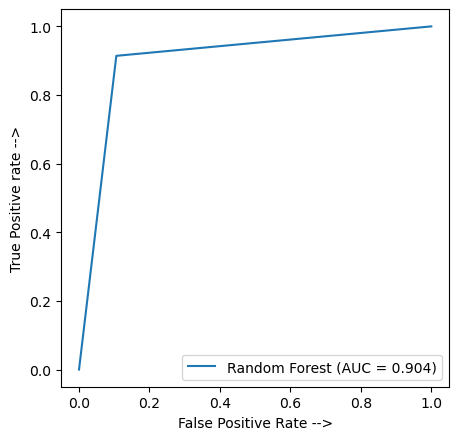

In [18]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random Forest (AUC = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [19]:
RF_cm_opt = confusion_matrix(y_test, RF_y_predicted_opt)
RF_cm_opt

array([[667,  79],
       [ 55, 586]], dtype=int64)

Text(69.0, 0.5, 'Truth')

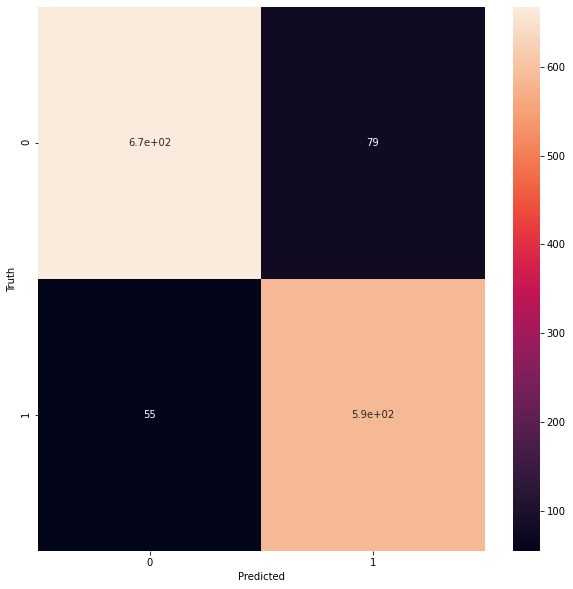

In [20]:
plt.figure(figsize=(10,10))
sn.heatmap(RF_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Multi Runs

In [21]:

RF_accuracy=[]
RF_f1score=[]
RF_roc=[]

for i in range(100):
    RF_model_multi = RandomForestClassifier(max_depth=15, max_features=4, n_estimators=70)
    RF_model_multi.fit(X_train, y_train)
    
    RF_y_predicted_multi = RF_model_multi.predict(X_test)
    
    acc = accuracy_score(y_test, RF_y_predicted_multi)
    RF_accuracy.append(acc)
    
    f1 = f1_score(y_test, RF_y_predicted_multi)
    RF_f1score.append(f1)
    
    rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, RF_y_predicted_multi)
    auc_rfc = auc(rfc_fpr, rfc_tpr)
    RF_roc.append(auc_rfc)
    
    
    

<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was pass

<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was pass

<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-21-c6c2321a0146>:7: DataConversionWarning: A column-vector y was pass

In [22]:
acc_average = statistics.mean(RF_accuracy)
f1_average = statistics.mean(RF_f1score)
roc_average = statistics.mean(RF_roc)

print('This is the accuracy average', acc_average)
print('This is the F1 average', f1_average)
print('This is the AUC average', roc_average)

acc_max = max(RF_accuracy)
f1_max = max(RF_f1score)
roc_max = max(RF_roc)

print('This is the accuracy maximum', acc_max)
print('This is the F1 maximum', f1_max)
print('This is the AUC maximum', roc_max)

acc_min = min(RF_accuracy)
f1_min = min(RF_f1score)
roc_min = min(RF_roc)

print('This is the accuracy minimum', acc_min)
print('This is the F1 minimum', f1_min)
print('This is the AUC minimum', roc_min)

acc_stdev = np.std(RF_accuracy)
f1_stdev = np.std(RF_f1score)
roc_stdev = np.std(RF_roc)

print('This is the accuracy standard deviation', acc_stdev)
print('This is the F1 standard deviation', f1_stdev)
print('This is the AUC standard deviation', roc_stdev)

This is the accuracy average 0.8997620764239366
This is the F1 average 0.8937087600175001
This is the AUC average 0.900616517422091
This is the accuracy maximum 0.9084354722422494
This is the F1 maximum 0.9037149355572404
This is the AUC maximum 0.9099388104210495
This is the accuracy minimum 0.8918529199711608
This is the F1 minimum 0.8846153846153846
This is the AUC minimum 0.8922176726211141
This is the accuracy standard deviation 0.003018584573339769
This is the F1 standard deviation 0.0033694787129996207
This is the AUC standard deviation 0.0031423147923510713


## Support Vector Machines

#### Optimising

In [24]:
'''Optimising the model to get the optimal hyperparameters'''

SVM_model = SVC()
SVM_model.fit(X_train, y_train)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [25]:
SVM_y_predicted = SVM_model.predict(X_test)

In [26]:
SVM_cm = confusion_matrix(y_test, SVM_y_predicted)
SVM_cm

array([[641, 105],
       [ 37, 604]], dtype=int64)

Text(69.0, 0.5, 'Truth')

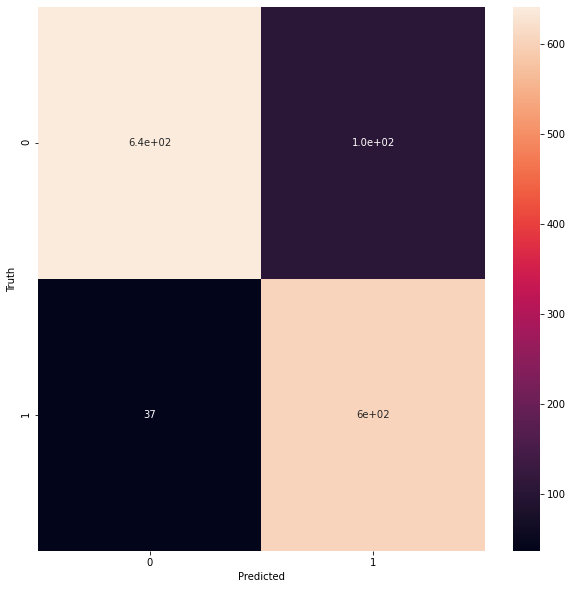

In [27]:
plt.figure(figsize=(10,10))
sn.heatmap(SVM_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
SVM_model.score(X_test, y_test)

0.8976207642393655

In [29]:
print('F1 Score: ', f1_score(y_test, SVM_y_predicted))

F1 Score:  0.8948148148148148


In [30]:
rfc_fpr_SVM, rfc_tpr_SVM, threshold_SVM = roc_curve(y_test, SVM_y_predicted)
auc_rfc_SVM = auc(rfc_fpr_SVM, rfc_tpr_SVM)

print(auc_rfc_SVM)

0.9007635104331787


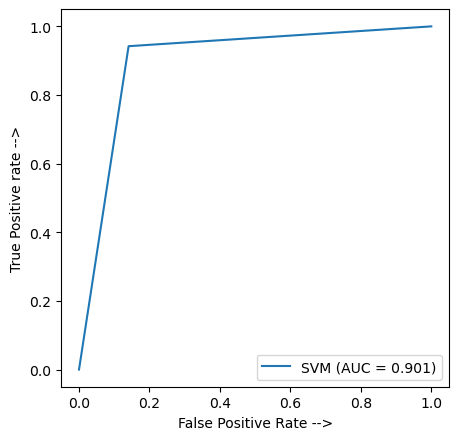

In [31]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_SVM, rfc_tpr_SVM, linestyle='-', label='SVM (AUC = %0.3f)' % auc_rfc_SVM)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [32]:
param_grid_SVM = [{
    'C':[0.5, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf','linear']},]

SVM_optimal_params = GridSearchCV(estimator=SVM_model, param_grid=param_grid_SVM, cv=10, n_jobs=-1)

SVM_optimal_params.fit(X_train, y_train)
print(SVM_optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Single Run after optimisation

In [33]:
SVM_model_opt = SVC(C=0.5, gamma=0.01, kernel='rbf')

SVM_model_opt.fit(X_train, y_train)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.5, gamma=0.01)

In [34]:
SVM_y_predicted_opt = SVM_model_opt.predict(X_test)

In [35]:
SVM_cm_opt = confusion_matrix(y_test, SVM_y_predicted_opt)
SVM_cm_opt

array([[644, 102],
       [ 34, 607]], dtype=int64)

Text(69.0, 0.5, 'Truth')

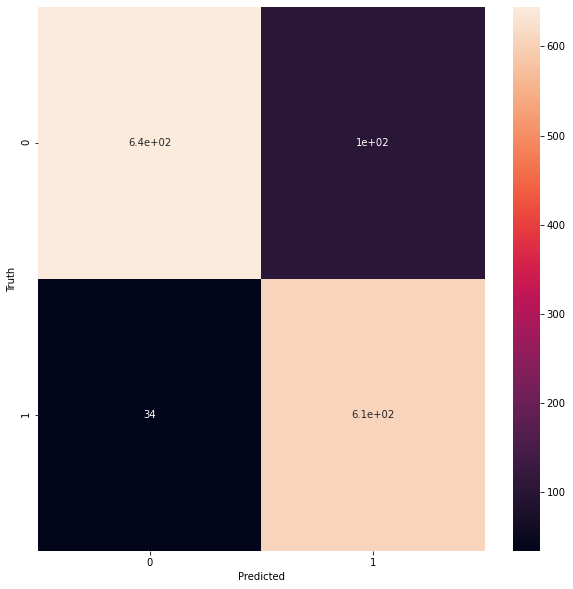

In [36]:
plt.figure(figsize=(10,10))
sn.heatmap(SVM_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
SVM_model_opt.score(X_test, y_test)

0.9019466474405191

In [38]:
print('F1 Score: ', f1_score(y_test, SVM_y_predicted_opt))

F1 Score:  0.8992592592592592


In [39]:
rfc_fpr_SVM_opt, rfc_tpr_SVM_opt, threshold_SVM_opt = roc_curve(y_test, SVM_y_predicted_opt)
auc_rfc_SVM_opt = auc(rfc_fpr_SVM_opt, rfc_tpr_SVM_opt)

print(auc_rfc_SVM_opt)

0.9051143278975126


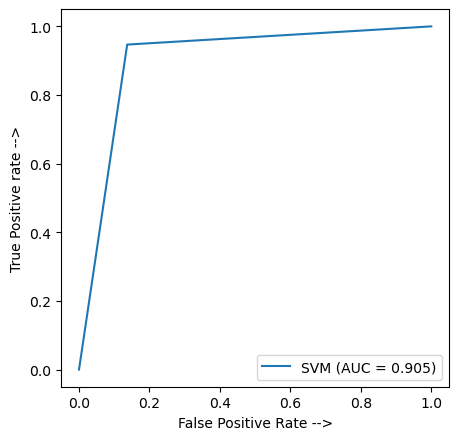

In [40]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_SVM_opt, rfc_tpr_SVM_opt, linestyle='-', label='SVM (AUC = %0.3f)' % auc_rfc_SVM_opt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

#### Multi Run

In [41]:

SVM_accuracy=[]
SVM_f1score=[]
SVM_roc=[]

for i in range(100):
    SVM_model_multi = SVC(C=0.5, gamma=0.01, kernel='rbf')
    SVM_model_multi.fit(X_train, y_train)
    
    SVM_y_predicted_multi = SVM_model_multi.predict(X_test)
    
    acc = accuracy_score(y_test, SVM_y_predicted_multi)
    SVM_accuracy.append(acc)
    
    f1 = f1_score(y_test, SVM_y_predicted_multi)
    SVM_f1score.append(f1)
    
    rfc_fpr_SVM, rfc_tpr_SVM, threshold_SVM = roc_curve(y_test, SVM_y_predicted_multi)
    auc_rfc_SVM = auc(rfc_fpr_SVM, rfc_tpr_SVM)
    SVM_roc.append(auc_rfc_SVM)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
acc_average = statistics.mean(SVM_accuracy)
f1_average = statistics.mean(SVM_f1score)
roc_average = statistics.mean(SVM_roc)

print('This is the accuracy average', acc_average)
print('This is the F1 average', f1_average)
print('This is the AUC average', roc_average)

acc_max = max(SVM_accuracy)
f1_max = max(SVM_f1score)
roc_max = max(SVM_roc)

print('This is the accuracy maximum', acc_max)
print('This is the F1 maximum', f1_max)
print('This is the AUC maximum', roc_max)

acc_min = min(SVM_accuracy)
f1_min = min(SVM_f1score)
roc_min = min(SVM_roc)

print('This is the accuracy minimum', acc_min)
print('This is the F1 minimum', f1_min)
print('This is the AUC minimum', roc_min)

acc_stdev = np.std(SVM_accuracy)
f1_stdev = np.std(SVM_f1score)
roc_stdev = np.std(SVM_roc)

print('This is the accuracy standard deviation', acc_stdev)
print('This is the F1 standard deviation', f1_stdev)
print('This is the AUC standard deviation', roc_stdev)

This is the accuracy average 0.9019466474405191
This is the F1 average 0.8992592592592592
This is the AUC average 0.9051143278975126
This is the accuracy maximum 0.9019466474405191
This is the F1 maximum 0.8992592592592592
This is the AUC maximum 0.9051143278975126
This is the accuracy minimum 0.9019466474405191
This is the F1 minimum 0.8992592592592592
This is the AUC minimum 0.9051143278975126
This is the accuracy standard deviation 5.551115123125783e-16
This is the F1 standard deviation 0.0
This is the AUC standard deviation 0.0


## Logistic regression

#### Optimising

In [157]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_test, y_test)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [158]:
log_reg_y_predicted = log_reg_model.predict(X_test)

In [159]:
log_reg_cm = confusion_matrix(y_test, log_reg_y_predicted)
log_reg_cm

array([[675,  71],
       [ 55, 586]], dtype=int64)

Text(69.0, 0.5, 'Truth')

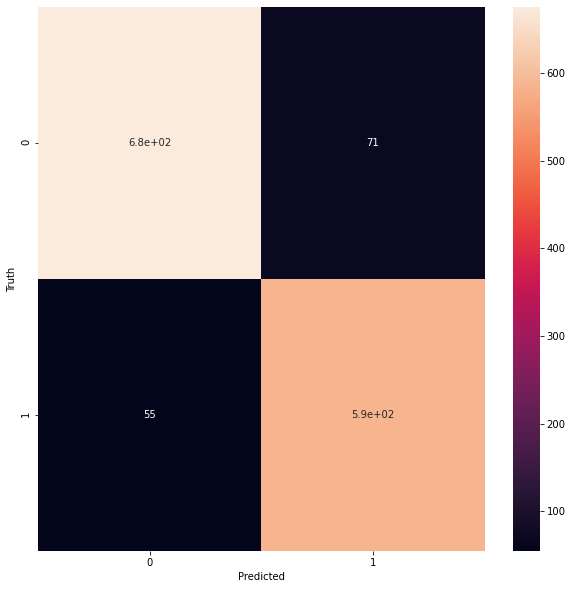

In [160]:
plt.figure(figsize=(10,10))
sn.heatmap(log_reg_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [161]:
log_reg_model.score(X_test, y_test)

0.9091564527757751

In [162]:
print('F1 Score: ', f1_score(y_test, log_reg_y_predicted))

F1 Score:  0.9029275808936825


In [163]:
rfc_fpr_log_reg, rfc_tpr_log_reg, threshold_log_reg = roc_curve(y_test, log_reg_y_predicted)
auc_rfc_log_reg = auc(rfc_fpr_log_reg, rfc_tpr_log_reg)

print(auc_rfc_log_reg)

0.9095111525640651


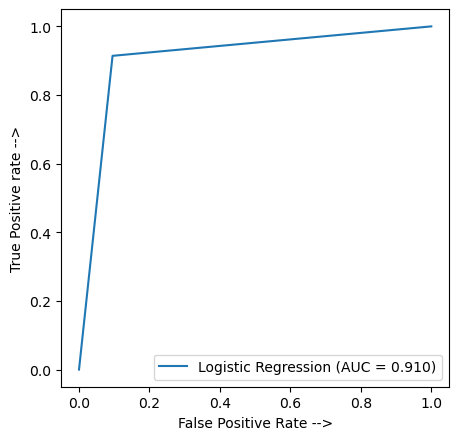

In [164]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_log_reg, rfc_tpr_log_reg, linestyle='-', label='Logistic Regression (AUC = %0.3f)' % auc_rfc_log_reg)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [165]:
param_grid_log_reg = [{
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [100,1000,2500,5000]},]


log_reg_optimal_params = GridSearchCV(estimator=log_reg_model, param_grid= param_grid_log_reg, cv=10, n_jobs=-1)

log_reg_optimal_params.fit(X_train, y_train)

print(log_reg_optimal_params.best_params_)

{'C': 1.623776739188721, 'max_iter': 100, 'solver': 'liblinear'}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Single run after optimisation

In [166]:
log_reg_model_opt = LogisticRegression(C=1.623776739188721, max_iter=100, solver='liblinear')
log_reg_model_opt.fit(X_test, y_test)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1.623776739188721, solver='liblinear')

In [167]:
log_reg_y_predicted_opt = log_reg_model_opt.predict(X_test)

In [168]:
log_reg_cm_opt = confusion_matrix(y_test, log_reg_y_predicted_opt)
log_reg_cm_opt

array([[675,  71],
       [ 55, 586]], dtype=int64)

Text(69.0, 0.5, 'Truth')

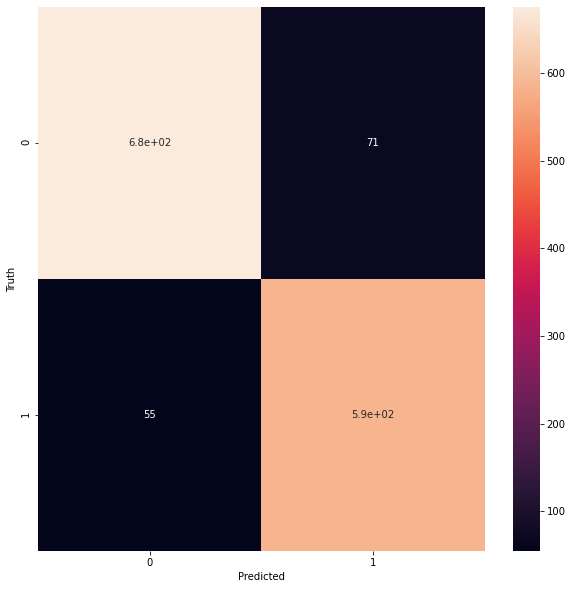

In [169]:
plt.figure(figsize=(10,10))
sn.heatmap(log_reg_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
log_reg_model_opt.score(X_test, y_test)

0.9091564527757751

In [171]:
print('F1 Score: ', f1_score(y_test, log_reg_y_predicted_opt))

F1 Score:  0.9029275808936825


In [172]:
rfc_fpr_log_reg_opt, rfc_tpr_log_reg_opt, threshold_log_reg_opt = roc_curve(y_test, log_reg_y_predicted_opt)
auc_rfc_log_reg_opt = auc(rfc_fpr_log_reg_opt, rfc_tpr_log_reg_opt)

print(auc_rfc_log_reg_opt)

0.9095111525640651


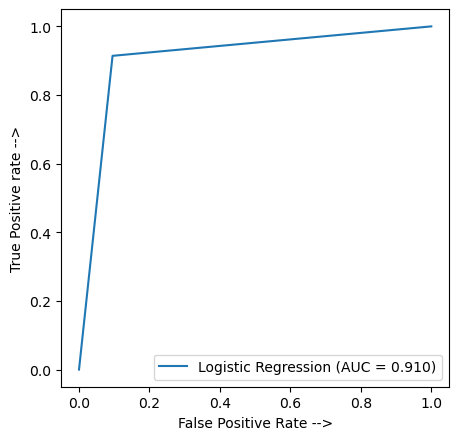

In [173]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_log_reg_opt, rfc_tpr_log_reg_opt, linestyle='-', label='Logistic Regression (AUC = %0.3f)' % auc_rfc_log_reg_opt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

#### Multi Run

In [43]:

log_reg_accuracy=[]
log_reg_f1score=[]
log_reg_roc=[]

for i in range(100):
    log_reg_model_multi = LogisticRegression(C=1.623776739188721, max_iter=100, solver='liblinear')
    log_reg_model_multi.fit(X_test, y_test)
    
    log_reg_y_predicted_multi = log_reg_model_multi.predict(X_test)
    
    acc = accuracy_score(y_test, log_reg_y_predicted_multi)
    log_reg_accuracy.append(acc)
    
    f1 = f1_score(y_test, log_reg_y_predicted_multi)
    log_reg_f1score.append(f1)
    
    rfc_fpr_log_reg, rfc_tpr_log_reg, threshold_log_reg = roc_curve(y_test, log_reg_y_predicted_multi)
    auc_rfc_log_reg = auc(rfc_fpr_log_reg, rfc_tpr_log_reg)
    log_reg_roc.append(auc_rfc_log_reg)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [44]:
acc_average = statistics.mean(log_reg_accuracy)
f1_average = statistics.mean(log_reg_f1score)
roc_average = statistics.mean(log_reg_roc)

print('This is the accuracy average', acc_average)
print('This is the F1 average', f1_average)
print('This is the AUC average', roc_average)

acc_max = max(log_reg_accuracy)
f1_max = max(log_reg_f1score)
roc_max = max(log_reg_roc)

print('This is the accuracy maximum', acc_max)
print('This is the F1 maximum', f1_max)
print('This is the AUC maximum', roc_max)

acc_min = min(log_reg_accuracy)
f1_min = min(log_reg_f1score)
roc_min = min(log_reg_roc)

print('This is the accuracy minimum', acc_min)
print('This is the F1 minimum', f1_min)
print('This is the AUC minimum', roc_min)

acc_stdev = np.std(log_reg_accuracy)
f1_stdev = np.std(log_reg_f1score)
roc_stdev = np.std(log_reg_roc)

print('This is the accuracy standard deviation', acc_stdev)
print('This is the F1 standard deviation', f1_stdev)
print('This is the AUC standard deviation', roc_stdev)

This is the accuracy average 0.9091564527757751
This is the F1 average 0.9029275808936825
This is the AUC average 0.9095111525640651
This is the accuracy maximum 0.9091564527757751
This is the F1 maximum 0.9029275808936825
This is the AUC maximum 0.9095111525640651
This is the accuracy minimum 0.9091564527757751
This is the F1 minimum 0.9029275808936825
This is the AUC minimum 0.9095111525640651
This is the accuracy standard deviation 2.220446049250313e-16
This is the F1 standard deviation 0.0
This is the AUC standard deviation 3.3306690738754696e-16


## K-Nearest Neighbor

#### Optimising

In [176]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

<ipython-input-176-b91828b2874f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [177]:
knn_y_predicted = knn.predict(X_test)

In [178]:
knn_cm = confusion_matrix(y_test, knn_y_predicted)
knn_cm

array([[657,  89],
       [ 51, 590]], dtype=int64)

Text(69.0, 0.5, 'Truth')

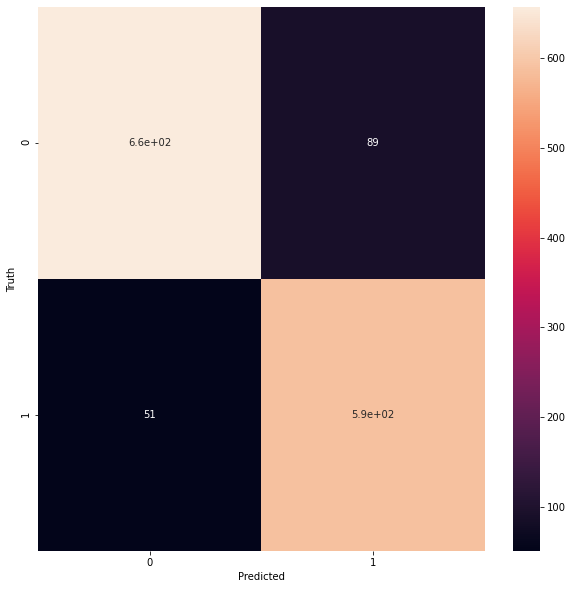

In [179]:
plt.figure(figsize=(10,10))
sn.heatmap(knn_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [180]:
knn.score(X_test, y_test)

0.8990627253064167

In [181]:
print('F1 Score: ', f1_score(y_test, knn_y_predicted))

F1 Score:  0.8939393939393939


In [182]:
rfc_fpr_knn, rfc_tpr_knn, threshold_knn = roc_curve(y_test, knn_y_predicted)
auc_rfc_knn = auc(rfc_fpr_knn, rfc_tpr_knn)

print(auc_rfc_knn)

0.9005669342055184


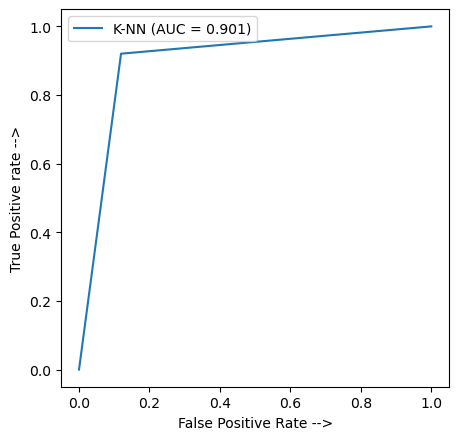

In [183]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_knn, rfc_tpr_knn, linestyle='-', label='K-NN (AUC = %0.3f)' % auc_rfc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [184]:
param_grid_knn = [{
        'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30,40,50],
            },]


knn_optimal_params = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=10, n_jobs=-1)

knn_optimal_params.fit(X_train, y_train)

print(knn_optimal_params.best_params_)

{'n_neighbors': 7}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


#### Single run after optimisation

In [185]:
knn_opt = KNeighborsClassifier(n_neighbors=7)
knn_opt.fit(X_train, y_train)

<ipython-input-185-eef6bd5a465c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_opt.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [186]:
knn_y_predicted_opt = knn_opt.predict(X_test)

In [187]:
knn_cm_opt = confusion_matrix(y_test, knn_y_predicted_opt)
knn_cm_opt

array([[657,  89],
       [ 51, 590]], dtype=int64)

Text(69.0, 0.5, 'Truth')

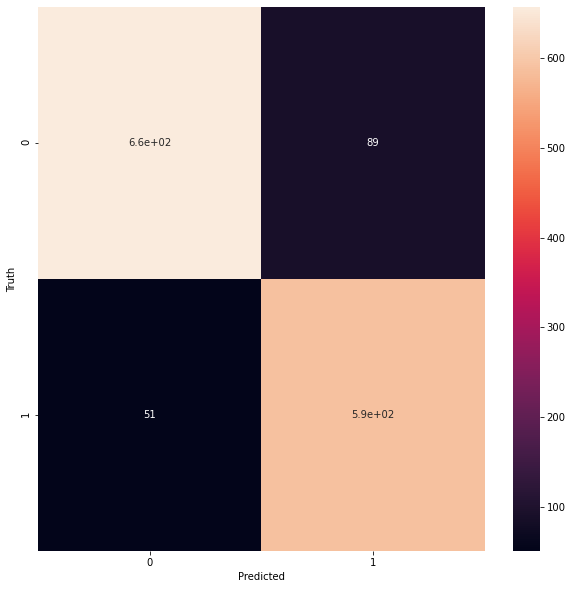

In [188]:
plt.figure(figsize=(10,10))
sn.heatmap(knn_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [189]:
knn_opt.score(X_test, y_test)

0.8990627253064167

In [190]:
print('F1 Score: ', f1_score(y_test, knn_y_predicted_opt))

F1 Score:  0.8939393939393939


In [191]:
rfc_fpr_knn_opt, rfc_tpr_knn_opt, threshold_knn_opt = roc_curve(y_test, knn_y_predicted_opt)
auc_rfc_knn_opt = auc(rfc_fpr_knn_opt, rfc_tpr_knn_opt)

print(auc_rfc_knn_opt)

0.9005669342055184


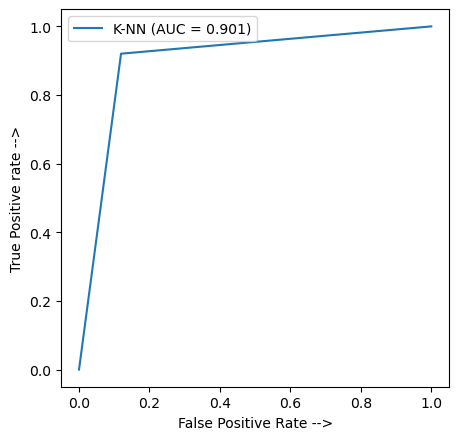

In [192]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_knn_opt, rfc_tpr_knn_opt, linestyle='-', label='K-NN (AUC = %0.3f)' % auc_rfc_knn_opt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

#### Multi Runs

In [46]:

knn_accuracy=[]
knn_f1score=[]
knn_roc=[]

for i in range(100):
    knn_multi = KNeighborsClassifier(n_neighbors=7)
    knn_multi.fit(X_train, y_train)
    
    knn_y_predicted_multi = knn_multi.predict(X_test)
    
    acc = accuracy_score(y_test, knn_y_predicted_multi)
    knn_accuracy.append(acc)
    
    f1 = f1_score(y_test, knn_y_predicted_multi)
    knn_f1score.append(f1)
    
    rfc_fpr_knn, rfc_tpr_knn, threshold_knn = roc_curve(y_test, knn_y_predicted_multi)
    auc_rfc_knn = auc(rfc_fpr_knn, rfc_tpr_knn)
    knn_roc.append(auc_rfc_knn)

<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d arr

<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d arr

<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-46-b285e420cd83>:7: DataConversionWarning: A column-vector y was passed when a 1d arr

In [47]:
acc_average = statistics.mean(knn_accuracy)
f1_average = statistics.mean(knn_f1score)
roc_average = statistics.mean(knn_roc)

print('This is the accuracy average', acc_average)
print('This is the F1 average', f1_average)
print('This is the AUC average', roc_average)

acc_max = max(knn_accuracy)
f1_max = max(knn_f1score)
roc_max = max(knn_roc)

print('This is the accuracy maximum', acc_max)
print('This is the F1 maximum', f1_max)
print('This is the AUC maximum', roc_max)

acc_min = min(knn_accuracy)
f1_min = min(knn_f1score)
roc_min = min(knn_roc)

print('This is the accuracy minimum', acc_min)
print('This is the F1 minimum', f1_min)
print('This is the AUC minimum', roc_min)

acc_stdev = np.std(knn_accuracy)
f1_stdev = np.std(knn_f1score)
roc_stdev = np.std(knn_roc)

print('This is the accuracy standard deviation', acc_stdev)
print('This is the F1 standard deviation', f1_stdev)
print('This is the AUC standard deviation', roc_stdev)

This is the accuracy average 0.8990627253064167
This is the F1 average 0.8939393939393939
This is the AUC average 0.9005669342055184
This is the accuracy maximum 0.8990627253064167
This is the F1 maximum 0.8939393939393939
This is the AUC maximum 0.9005669342055184
This is the accuracy minimum 0.8990627253064167
This is the F1 minimum 0.8939393939393939
This is the AUC minimum 0.9005669342055184
This is the accuracy standard deviation 1.1102230246251565e-16
This is the F1 standard deviation 0.0
This is the AUC standard deviation 2.220446049250313e-16
